**Reference:** [Building your First AI Agent with LangGraph (Analytics Vidhya)](https://courses.analyticsvidhya.com/courses/take/building-your-first-ai-agent-with-langgraph/assignments/60490544-project-creating-a-conversational-ai)

Now we can create Chatbot using LangGraph. Here in the Node Function we would call LLM to do a research on several topics.

### Install LangGraph

In [0]:
!pip install -q langgraph==0.2.59

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


### Initial Imports

In [0]:
from langgraph.graph import StateGraph, MessagesState, START, END
from typing import TypedDict
from langchain_openai import ChatOpenAI
from langgraph.prebuilt import ToolNode
from langchain_community.tools import TavilySearchResults
from IPython.display import Image
from dotenv import load_dotenv, find_dotenv
from typing import Annotated
from langgraph.graph.message import add_messages
import os

### Read .env file

In [0]:
_ = load_dotenv(find_dotenv())
OPENAI_KEY = os.environ['OPENAI_API_KEY']

### Define Initial State

In [0]:
class MessagesState(TypedDict):
    messages: Annotated[list, add_messages]

In [0]:
# The above function can also be called using 
# from langgraph.graph import MessagesState

### Define Functions to be used as Nodes in the Graph

In [0]:
llm = ChatOpenAI(model='gpt-4o-mini', temperature=0)

In [0]:
def should_continue(state: MessagesState) -> bool:
    messages = state['messages']
    last_message = messages[-1]
    if last_message.tool_calls:
        return 'tools'
    else:
        return END

In [0]:
def call_model(state: MessagesState):
    messages  = state['messages']
    response = llm.invoke(messages)
    
    return {'messages': messages + [response]}

### Initialize the Graph

In [0]:
graph = StateGraph(MessagesState)

### Create the Tools

In [0]:
search_tool = TavilySearchResults(max_results=5)
tools = [search_tool]

tool_node = ToolNode(tools)

### Add Nodes in the Graph

In [0]:
graph.add_node('agent', call_model)
graph.add_node('tools', tool_node)

### Add Edges in the Graph

In [0]:
graph.add_edge(START, "agent")

In [0]:
graph.add_conditional_edges('agent', 
                            should_continue,
                            ["tools",END])

In [0]:
graph.add_edge('tools', 'agent')

### Set Entry Point to the Graph

In [0]:
graph.set_entry_point('agent')

### Compile the graph to make it invoke ready

In [0]:
graph_compiled = graph.compile()

### Display the Graph

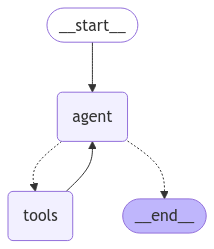

In [0]:
Image(graph_compiled.get_graph().draw_mermaid_png())

### Invoke the Graph

In [0]:
output = graph_compiled.invoke({'messages': [
    ('user', 'Write a simple report on how to use AI for productivity.')
]})

output

{'messages': [HumanMessage(content='Write a simple report on how to use AI for productivity.', additional_kwargs={}, response_metadata={}, id='4d4293c6-7fe3-47dc-bace-a598db9e0588'),
  AIMessage(content='# Report on Using AI for Productivity\n\n## Introduction\nArtificial Intelligence (AI) has emerged as a transformative tool in various sectors, enhancing productivity and efficiency. This report outlines practical ways to leverage AI for improving productivity in both personal and professional settings.\n\n## 1. Task Automation\nAI can automate repetitive tasks, allowing individuals and teams to focus on more strategic activities. Common applications include:\n\n- **Email Management**: AI tools can sort, prioritize, and respond to emails, reducing the time spent on inbox management.\n- **Scheduling**: AI-powered scheduling assistants can coordinate meetings by finding suitable times for all participants, eliminating back-and-forth communication.\n\n## 2. Data Analysis\nAI excels at pro

In [0]:
print(output["messages"][0].content)

Write a simple report on how to use AI for productivity.


In [0]:
print(output["messages"][-1].content)

# Report on Using AI for Productivity

## Introduction
Artificial Intelligence (AI) has emerged as a transformative tool in various sectors, enhancing productivity and efficiency. This report outlines practical ways to leverage AI for improving productivity in both personal and professional settings.

## 1. Task Automation
AI can automate repetitive tasks, allowing individuals and teams to focus on more strategic activities. Common applications include:

- **Email Management**: AI tools can sort, prioritize, and respond to emails, reducing the time spent on inbox management.
- **Scheduling**: AI-powered scheduling assistants can coordinate meetings by finding suitable times for all participants, eliminating back-and-forth communication.

## 2. Data Analysis
AI excels at processing and analyzing large datasets quickly. This capability can be utilized in various ways:

- **Business Intelligence**: AI tools can analyze sales data, customer behavior, and market trends, providing insights t